# **Project1**

# **주제**

**' 다음 분기에 어떤 게임을 설계해야 할까 '**


◼ **반드시 들어가야 하는 내용**

1. **지역에 따라서 선호하는 게임 장르가 다를까** 라는 질문에 대답을 하셔야합니다.

2. **연도별 게임의 트렌드가 있을까** 라는 질문에 대답을 하셔야합니다.

3. **출고량이 높은 게임에 대한 분석 및 시각화 프로세스**가 포함되어야 합니다.

위 3가지 내용과 개인적인 분석 목표, 질문을 더하여 프로젝트를 완성하세요.

**◼ Data Description**


*   **Name** : 게임의 이름입니다.

*   **Platform** : 게임이 지원되는 플랫폼의 이름입니다.
*   **Year** : 게임이 출시된 연도입니다.

*   **Genre** : 게임의 장르입니다.

*   **Publisher** : 게임을 제작한 회사입니다.

*   **NA_Sales** : 북미지역에서의 출고량입니다.

*   **EU_Sales** : 유럽지역에서의 출고량입니다.

*   **JP_Sales** : 일본지역에서의 출고량입니다.

*   **Other_Sales** : 기타지역에서의출고량입니다.



# **1. EDA_데이터 전처리**

*   판매량의 단위는 M으로 전부 통일

*   year에서 09,10은 2009, 2010으로 변경

*   year에서 97, 95는 1997, 1995로 변경

*   판매의 nan값은 판매량이 없다는 뜻으로 0값으로 대체

*   나머지 nan값 제거


In [ ]:
# Google 드라이브를 마운트
from google.colab import drive  
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Google 드라이브에서 'vgames2.csv'파일 가져오기
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Project/S1/vgames2.csv')
df.set_index('Unnamed: 0', inplace=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Unnamed: 0,,,,,,,,,
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13


In [ ]:
# 결측값 확인
# 'Year', 'Genre', 'Publisher'에 결측값 존재함을 확인
df.isnull().sum() 

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
# 데이터 타입 확인
# 데이터 타입을 numerical로 변환해야 함
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
# Sales 컬럼들 전처리
# 컬럼에 있는 k, m 처리 (판매량의 단위는 M으로 전부 통일)
def K_M_(col, int1):
    def k_(string):
        return str(int(string.replace('K',''))/1000)
   
    def M_(string):
        return string.replace('M','')

    # 0M, 0K 문자 0으로 전처리
    df.loc[df[col] == '0M',col] = '0'
    df.loc[df[col] == '0K',col] = '0'

    # K포함문자와 M포함문자 결측값 전처리
    index1 = df.query('{0}.str.contains("K")'.format(col),engine='python').index 
    df.iloc[index1-1,int1] = df.iloc[index1-1,int1].apply(k_)
    index2 = df.query('{0}.str.contains("M")'.format(col),engine='python').index
    df.iloc[index2-1,int1] = df.iloc[index2-1,int1].apply(M_)
    
    # sales칼럼 숫자형으로 형변환
    df[col] = df[col].astype(float)

col_sales = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
k = 5
for i in col_sales:
    K_M_(i, k)
    k+=1

In [ ]:
# Year 컬럼 전처리
# year에서 09,10은 2009, 2010으로 변경
# year에서 97, 95는 1997, 1995로 변경
def year(string):
    if string <= 20:
        string += 2000
        return string
    elif string >=20 and string <= 100:
        string += 1900
        return string
    else:
        return string

df['Year'] = df['Year'].apply(year)
df['Year'].unique()

array([2008., 2009., 2010., 2005., 2011., 2007., 2001., 2003., 2006.,
       2014., 2015., 2002., 1997., 2013., 1996., 2004., 2000.,   nan,
       1984., 1998., 2016., 1985., 1999., 1995., 1993., 2012., 1987.,
       1982., 1994., 1990., 1992., 1991., 1983., 1988., 1981., 1989.,
       1986., 2017., 1980., 2020.])

In [ ]:
# 나머지 nan값 제거
# 결측값이 포함되어 있는 행 제거 
df = df.dropna()
df1 = df

# 결측치 재확인
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [ ]:
# 전처리 완료된 데이터 확인
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Unnamed: 0,,,,,,,,,
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04


# **2. 가설 검정 및 시각화**

# **가설 1 : 지역에 따라서 선호하는 게임 장르가 다를까**

*   유럽/북미/일본/기타 지역에 따라서 선호하는 게임 장르 top3 분석 

   (지역별 출고량 기준 비교)

*   지역별 게임장르의 평균이 유의미한 차이가 있는지 검증하기 위해 ANOVA TEST 진행

*   차이가 있다면 어떻게 차이가 있는지 시각화(bar차트)


In [ ]:
# 지역별 게임장르의 평균이 유의미한 차이가 있는지 검증하기 위해 ANOVA TEST 진행
from scipy.stats import f_oneway

# 게임장르의 평균 구하기
df_Gm = df.groupby(df['Genre']).mean()
df_Gm = df_Gm.iloc[:,1:]
df_Gm = df_Gm.T

columns = df['Genre'].dropna().unique() # Action, Adventure
locals = df_Gm.index # NA_Salse, UA_Sales, JP_Sales, Other_Sales
crosstabs = []

# 지역별 게임장르의 출고량
for lc in locals:
    cro = pd.crosstab(index = df[lc], columns = df['Genre'], values = df[lc], aggfunc = 'sum').fillna(0)
    crosstabs.append(cro)

cro1 = crosstabs[0].iloc[1:, :]
cro2 = crosstabs[1].iloc[1:, :]
cro3 = crosstabs[2].iloc[1:, :]
cro4 = crosstabs[3].iloc[1:, :]

for i ,k in enumerate(['NA','UA','JP','OT']):
    for j in range(12):
        globals()['g{}'.format(j+1)] = globals()['cro{}'.format(i+1)][columns[j]]
    globals()['{}'.format(k)] = f_oneway(g1, g2, g3, g4, g5, g6, g7, g8, g9, g10, g11, g12)

print('NA_Sales 장르별 출고량에 따른 ANOVA분석 :' ,NA[1])
print('UA_Sales 장르별 출고량에 따른 ANOVA분석 :' ,UA[1])
print('JP_Sales 장르별 출고량에 따른 ANOVA분석 :' ,JP[1])
print('Other_Sales 장르별 출고량에 따른 ANOVA분석 :' ,OT[1])


NA_Sales 장르별 판매량에 따른 ANOVA분석 : 1.3139136573781143e-101
UA_Sales 장르별 판매량에 따른 ANOVA분석 : 4.720384460008953e-91
JP_Sales 장르별 판매량에 따른 ANOVA분석 : 3.064802264365316e-93
Other_Sales 장르별 판매량에 따른 ANOVA분석 : 6.722692407359089e-54


**< ANOVA TEST >**


*   귀무가설 : 지역마다 장르에 따른 출고량의 차이가 없다.

*   대립가설 : 지역마다 장르에 따른 출고량의 차이가 있다.

*   결과 : 지역에 따른 장르별 출고량의 ANOVA분석의 P-valus 값이 유의수준 0.05보다 전부 작기 때문에 지역마다 장르에 따른 출고량에는 차이가 있다고 볼 수 있다.


**< 사후검정 >**

*   지역마다 게임의 장르가 어떻게 차이가 있을까?

*   차이가 있다면 어떻게 차이가 있는지 시각화(bar차트)


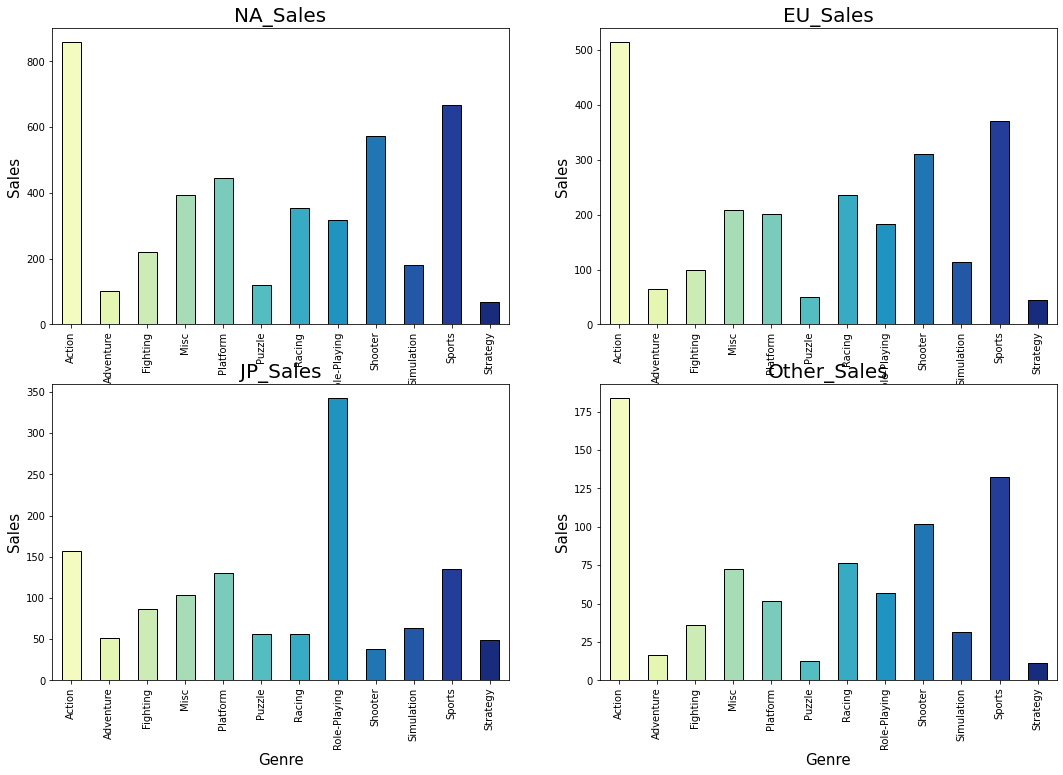

In [ ]:
df_Genre = df.groupby(df['Genre']).sum().iloc[:,1:]

# 장르별 차이 시각화 (bar차트)
grp = ['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']
plt.rcParams['figure.figsize'] = [18, 12]

colors = sns.color_palette('YlGnBu',len(df_Genre.index))

for i, grp in enumerate(grp):
    plt.subplot(2, 2, i+1)
    df_Genre[grp].plot(kind = 'bar', color=colors, edgecolor='black', alpha = 1);
    plt.title('%s' %grp, fontsize=20)
    plt.xlabel('Genre', fontsize=15)
    plt.ylabel('Sales', fontsize=15)

**< 장르별 차이 시각화 결과 >**

*   북미, 유럽과 그 외 지역은 'Action' 장르가 가장 많은 출고량을 보이고, 다음으로 'sports', 'shooter순이다.

*   일본은 'Role-Playing' 장르가 가장 많은 출고량을 보이고, 다음으로 'Action',  'Sports'순이다.


**< 가설1에 대한 결론 >**

*   북미 지역에서 가장 많이 선호된 장르 : Action

*   유럽 지역에서 가장 많이 선호된 장르 : Action


*   일본 지역에서 가장 많이 선호된 장르 : Role-Playing

*   기타 지역에서 가장 많이 선호된 장르 : Action

 ▶ **결론 : 일본 지역을 제외한 다른 지역에서는 선호하는 게임 장르가 유사하다고 할 수 있다.**



# **가설 2 : 연도별 게임의 트렌드가 있을까**

*   시간에 따른 장르별 출고량의 차이가 있을까?(line차트)

*   시간에 따른 플랫폼별 출고량의 차이가 있을까?(line차트)

In [ ]:
#한글깨짐 해결
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
# 설정
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rc('font', family = 'NanumGothic')
plt.rc('axes', unicode_minus=False)

In [ ]:
# 연도별 게임 전체 트렌드 - 연도별 총 출고량 확인
df1['Global_Sales'] = df1['NA_Sales'] + df1['EU_Sales'] + df1['JP_Sales'] + df1['Other_Sales']
df_year = df1.groupby(df['Year']).sum()
df_year = df_year.iloc[:,1:]

In [ ]:
# 연도별 게임 장르 트렌드 - 연도 별로 어떤 장르가 가장 많이 출시되었을까?
# 시기별 어떤 장르가 많이 나왔는지 알 수 있다.
pd_cross1 = pd.crosstab(index = df1['Year'], columns = df1['Genre'], values= df1['Global_Sales'],aggfunc='sum').fillna(0)

# 연도별 게임 플랫폼 트렌드 - 연도 별로 어떤 플랫폼이 가장 많이 출시되었을까?
# 시기별 어떤 플랫폼이 많이 나왔는지 알 수 있다.
pd_cross2 = pd.crosstab(index = df1['Year'], columns = df1['Platform'], values= df1['Global_Sales'],aggfunc='sum').fillna(0)

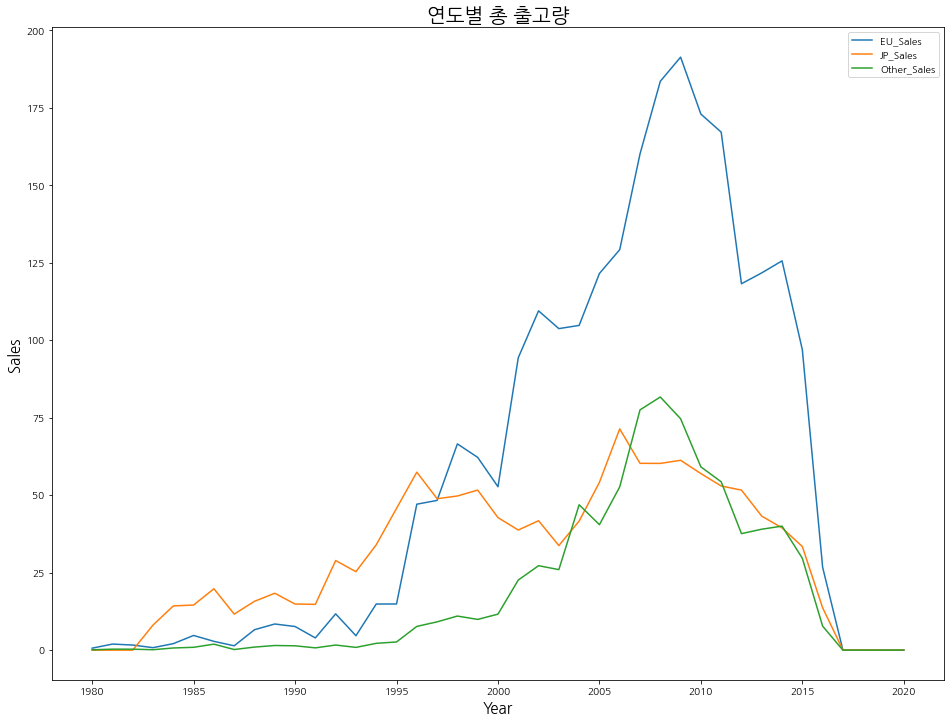

In [ ]:
# 연도에 따라 지역별 총 출고량 시각화 (line차트)
plt.rcParams['figure.figsize'] = [16, 12]
sns.lineplot(data = df_year.iloc[:,:-1],  dashes = False);
plt.title('연도별 총 출고량', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.show()

In [ ]:
pd_cross0 = pd_cross1.T

year = ['1980-1984','1985-1989','1990-1994','1995-1999','2000-2004','2005-2009','2010-2014']
k = 1980
for i in year:
    pd_cross0[i] = pd_cross0[k]+pd_cross0[k+1]+pd_cross0[k+2]+pd_cross0[k+3]+pd_cross0[k+4]
    k+=5
    
pd_cross0['2015-2019'] =  pd_cross0[2015]+pd_cross0[2016]+pd_cross0[2017]+pd_cross0[2020]
pd_cross0 = pd_cross0.iloc[:,-8:].T

pd_cross0

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980-1984,26.34,0.40,0.77,7.16,19.57,16.21,8.00,0.00,52.49,0.44,11.21,0.00
1985-1989,24.76,4.38,6.47,1.28,102.69,46.54,4.10,15.25,7.28,0.07,20.57,0.00
1990-1994,20.35,18.29,32.84,8.18,91.46,18.77,18.98,27.36,13.65,8.33,19.06,5.68
1995-1999,118.80,26.51,90.67,55.25,117.41,20.17,129.83,155.41,55.24,43.71,127.41,51.83
2000-2004,321.35,33.56,103.83,97.46,191.49,27.22,203.77,180.39,153.30,65.83,275.09,36.66
2005-2009,531.78,90.03,127.43,381.07,184.64,90.64,234.23,231.81,280.15,199.81,527.72,43.16
2010-2014,581.50,51.05,69.90,216.49,112.60,20.49,114.05,248.07,378.35,64.80,268.16,33.31
2015-2019,88.10,9.80,11.63,12.81,8.13,0.69,9.59,43.22,84.29,6.29,56.12,2.34


In [ ]:
pd_sum = pd_cross0.sum(axis=1)
pd_cross0['Sum'] = pd_sum

# pd_sum = pd_cross1.sum(axis=1)
# pd_cross1['Sum'] = pd_sum
columns = df['Genre'].dropna().unique()

for i in columns:
    pd_cross0[i] = pd_cross0[i] / pd_cross0['Sum']
pd_cross0 = pd_cross0.iloc[:,:-1]
pd_cross0 = pd_cross0.drop(['Strategy','Simulation','Fighting','Adventure'],axis = 1)

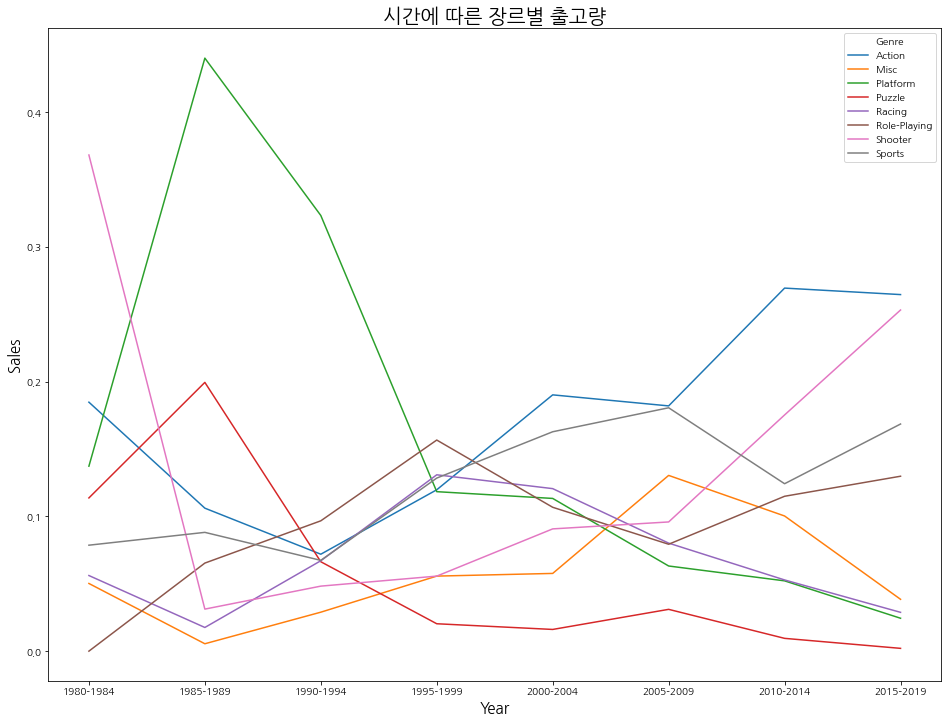

In [ ]:
# 시간에 따른 장르별 출고량의 차이(line차트)
plt.rcParams['figure.figsize'] = [16, 12]
sns.lineplot(data = pd_cross0,  dashes = False, alpha = 1);
plt.title('시간에 따른 장르별 출고량', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.show()

**1. 출고량에 따른 게임 장르 비율의 트렌드 시각화 결과**

*   1980 - 1984 : 'Shooter'장르가 트렌드

*   1985 - 1989 : 'Platform'장르가 트렌드

*   1990 - 2010 : 'Platform'장르가 줄어들면서 'Action'과 'Sports'장르가 상승

*   2010 - 2020 : 'Action'장르는 상위권을 유지하는 반면, 'Sport'의 인기는 줄어들고 'Shooter'장르가 다시 급 상승



In [ ]:
pd_cross3 = pd_cross2.T

year = ['1980-1984','1985-1989','1990-1994','1995-1999','2000-2004','2005-2009','2010-2014']
k = 1980
for i in year:
    pd_cross3[i] = pd_cross3[k]+pd_cross3[k+1]+pd_cross3[k+2]+pd_cross3[k+3]+pd_cross3[k+4]
    
    k+=5
pd_cross3['2015-2019'] =  pd_cross3[2015]+pd_cross3[2016]+pd_cross3[2017]+pd_cross3[2020]
pd_cross3 = pd_cross3.iloc[:,-8:].T

pd_cross4 = pd_cross3.drop(['3DO','DC','GEN','GG','NG','PCFX','PS4','PSV','SAT','SCD','XB','XOne','WS','WiiU','TG16'],axis = 1)
pd_cross4

Platform,2600,3DS,DS,GB,GBA,GC,N64,NES,PC,PS,PS2,PS3,PSP,SNES,Wii,X360
Year,,,,,,,,,,,,,,,,
1980-1984,81.55,0.00,0.00,0.00,0.00,0.00,0.00,61.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1985-1989,4.43,0.00,0.02,66.40,0.00,0.00,0.00,162.47,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1990-1994,0.00,0.00,0.00,48.13,0.00,0.00,0.00,27.54,15.87,6.03,0.00,0.00,0.00,150.45,0.00,0.00
1995-1999,0.00,0.00,0.00,110.90,0.00,0.00,179.55,0.00,34.09,578.47,0.00,0.00,0.00,49.59,0.00,0.00
2000-2004,0.00,0.00,17.41,29.00,264.87,156.87,37.21,0.00,38.02,140.66,803.06,0.00,7.09,0.00,0.00,0.00
2005-2009,0.00,0.00,670.16,0.00,39.89,39.15,0.00,0.00,45.42,0.00,413.81,345.55,219.44,0.00,676.69,412.45
2010-2014,0.00,198.30,129.31,0.00,0.00,0.00,0.00,0.00,108.85,0.00,5.57,580.46,64.19,0.00,221.90,542.29
2015-2019,0.00,33.52,0.29,0.00,0.00,0.00,0.00,0.00,10.63,0.00,0.00,20.73,0.12,0.00,1.56,13.85


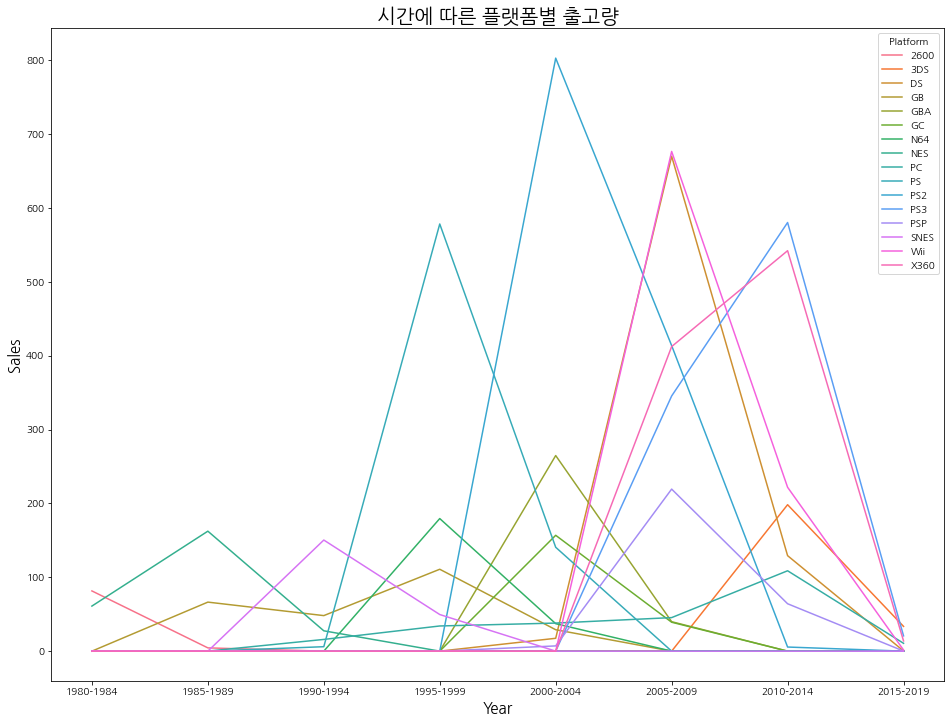

In [ ]:
# 시간에 따른 플랫폼별 출고량의 차이(line차트)
plt.rcParams['figure.figsize'] = [16, 12]
sns.lineplot(data = pd_cross4,  dashes = False);
plt.title('시간에 따른 플랫폼별 출고량', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.show()

**2. 출고량에 따른 게임 플랫폼 비율의 트렌드 시각화 결과**

*   1980 - 1989 : 'NES' 플랫폼이 트렌드

*   1990 - 1999 : 'PS' 플랫폼이 급상승하면서 트렌드의 변화가 옴

*   2000 - 2004 : 'PS2' 플랫폼이 출시되면서 이전 버전인 PS의 판매량은 줄고 신상인 PS2가 트렌드를 이끎

*   2005 - 2010 : 'DS'와 'Wii' 플랫폼이 출시되면서 트렌드의 변화가 옴

*   2010 - 2020 : 현재는 다시 새로운 버전인 'PS3' 플랫폼을 출시하고 'X360'이라는 새로운 플랫폼과 트렌드를 바꿈


**< 가설2에 대한 결론 >**

*   출고량에 따른 연도별 게임 장르의 트렌드

  1980년대 : 초반에는 'Shooter'장르가 트렌드였으나 후반에는 'Platfrom'장르가 트렌드

  1990~2010년대 : 'Platfoom'장르가 줄어들면서 'Action'과 'Sports'장르가 트렌드
  
  2010 - 2020년 : 'Action'장르는 상위권을 유지하는 반면, 'sport'의 인기는 줄어들고 'shooter'장르가 다시 급 상승하며 트렌드를 바꿈

*   출고량에 따른 연도별 게임 플랫폼의 트렌드

  1980년대 : 'NES' 플랫폼이 트렌드

  1990년대 : 'PS' 플랫폼이 급상승하면서 트렌드의 변화가 옴

  2000년대 초반 : 'PS2' 플랫폼이 출시되면서 이전 버전인 PS의 판매량은 줄고 신상인 PS2가 트렌드를 이끎

  2000년대 후반 : 'DS'와 'Wii' 플랫폼이 출시되면서 트렌드의 변화가 옴

  2010 - 2020년 : 현재는 다시 새로운 버전인 'PS3' 플랫폼을 출시하고 'X360'이라는 새로운 플랫폼과 트렌드를 바꿈

 ▶ **결론 : 게임 장르와 플랫폼의 트렌드 line차트를 통해 연도별 게임의 트렌드가 있음을 알 수 있다.**

# **가설 3 : 출고량이 높은 게임에 대한 분석 및 시각화 프로세스**

*   해당 연도의 각 장르별 가장 높은 출고량 시각화(각 지역별로 시각화)

*   해당 연도별로 출고량을 기준으로 각 장르의 인기를 시각화

In [ ]:
# 전체 게임 출고량 순위 조사 - (전 시기) 출고량 제일 많은 게임
df_Sales = df.iloc[:,[0,5,6,7,8]]
df_Sales['Global_Sales'] = df_Sales['NA_Sales'] + df_Sales['EU_Sales']+df_Sales['JP_Sales']+df_Sales['Other_Sales']
df_Sales = df_Sales.groupby(df_Sales['Name']).sum()

# (최근 10년 내에 출시된 게임 중) 출고량 제일 많은 게임
for i, k in enumerate(['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']):
    globals()['df_Sales{}'.format(i+1)] = df_Sales.sort_values(by=k, ascending = False).head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Global_Sales')

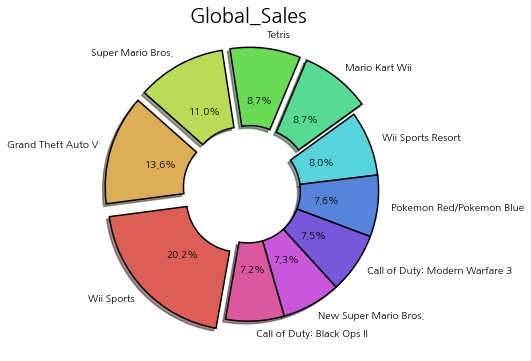

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 6]
wedgeprops={'width': 0.6, 'edgecolor': 'black', 'linewidth': 1.5} # 부채꼴 모양으로 해줌
colors = sns.color_palette('hls',len(df_Sales5.index))
plt.pie(df_Sales5['Global_Sales'], labels = df_Sales5.index,autopct='%.1f%%'
, startangle=260, counterclock=False, explode = [0.1,0.1,0.1,0.1,0.1,0,0,0,0,0]
, shadow=True, colors = colors, wedgeprops=wedgeprops); # shadow : 음영효과, explode : 돌출부분
plt.title('Global_Sales' , fontsize=20)

**< 전체 게임 중 출고량 제일 많은 게임 순위 >**

*   1위 : Will Sports

*   2위 : Grand Theft Auto V

*   3위 : super Mario Bros.

**<지역별 게임 출고량 조사>**

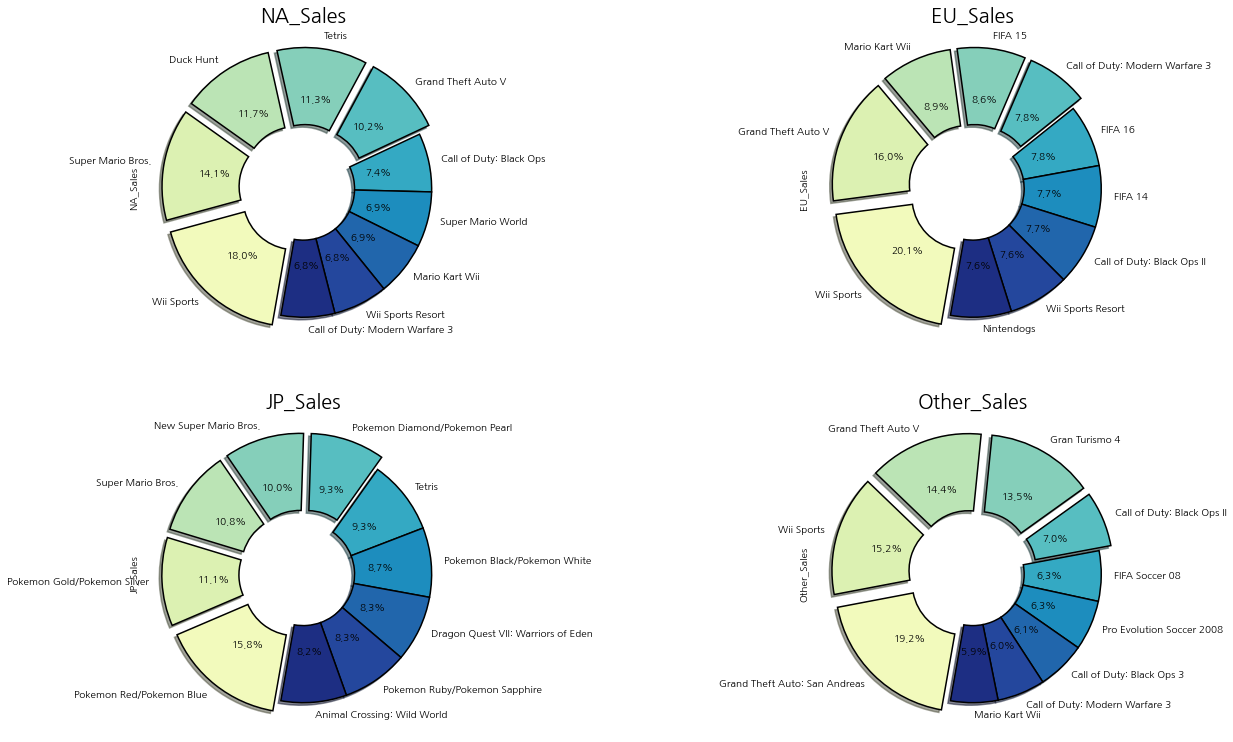

In [ ]:
# 지역별 게임 출고량 조사
grp = ['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']
plt.rcParams['figure.figsize'] = [22, 13]

wedgeprops={'width': 0.6, 'edgecolor': 'black', 'linewidth': 1.5} # 부채꼴 모양으로 해줌
colors = sns.color_palette('YlGnBu', 10)

for i , k in enumerate(grp):
    plt.subplot(2, 2, i+1)
    globals()['df_Sales{}'.format(i+1)][k].plot(kind = 'pie',autopct='%.1f%%'
    , startangle=260, counterclock=False, explode = [0.1,0.1,0.1,0.1,0.1,0,0,0,0,0]
    , shadow=True, colors = colors, wedgeprops=wedgeprops);
    plt.title(k, fontsize=20)

**<지역별 상위 5개 게임의 장르, 플랫폼 조사>**

1. 지역별 상위 5개 게임의 장르 조사

In [ ]:
# 지역별 상위 5개 게임의 장르 조사
grp = ['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']
for i ,k in enumerate(grp):
    globals()['df_{}'.format(k[:2])] = df[['Name','Platform','Genre',k]]
    
df_NA = df_NA[(df_NA['Name'] == 'Wii Sports')|(df_NA['Name'] == 'Super Mario Bros.')|(df_NA['Name'] == 'Duck Hunt')|(df_NA['Name'] == 'Tetris')|(df_NA['Name'] == 'Grand Theft Auto V')]
df_EU = df_EU[(df_EU['Name'] == 'Wii Sports')|(df_EU['Name'] == 'Grand Theft Auto V')|(df_EU['Name'] == 'Mario Kart Wii')|(df_EU['Name'] == 'FIFA 15')|(df_EU['Name'] == 'Call of Duty: Modern Warfare 3')]
df_JP = df_JP[(df_JP['Name'] == 'Pokemon Red/Pokemon Blue')|(df_JP['Name'] == 'Pokemon Gold/Pokemon Silver')|(df_JP['Name'] == 'Super Mario Bros.')|(df_JP['Name'] == 'New Super Mario Bros.')|(df_JP['Name'] == 'Pokemon Diamond/Pokemon Pearl')]
df_Ot = df_Ot[(df_Ot['Name'] == 'Grand Theft Auto: San Andreas')|(df_Ot['Name'] == 'Wii Sports')|(df_Ot['Name'] == 'Grand Theft Auto V')|(df_Ot['Name'] == 'Gran Turismo 4')|(df_Ot['Name'] == 'Call of Duty: Black Ops II')]

In [ ]:
v = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
w = ['df_NA','df_EU','df_JP','df_Ot']

for i, k ,j in zip(['df_NA_P','df_EU_P','df_JP_P','df_Ot_P'], w,v):
    globals()['{}'.format(i)]= globals()['{}'.format(k)].groupby(df['Platform']).sum().sort_values(by=j, ascending = False).head(3)
for i, k ,j in zip(['df_NA_G','df_EU_G','df_JP_G','df_Ot_G'], w, v):
    globals()['{}'.format(i)]= globals()['{}'.format(k)].groupby(df['Genre']).sum().sort_values(by=j, ascending = False).head(3)


In [ ]:
v = ['df_NA_P','df_EU_P','df_JP_P','df_Ot_P']
w = ['df_NA','df_EU','df_JP','df_Ot']
for i, k ,j in zip(v, w,['NA_Sales','EU_Sales','JP_Sales','Other_Sales']):
    globals()['{}'.format(i)]= globals()['{}'.format(k)].groupby(df['Platform']).sum().sort_values(by=j, ascending = False).head(3)

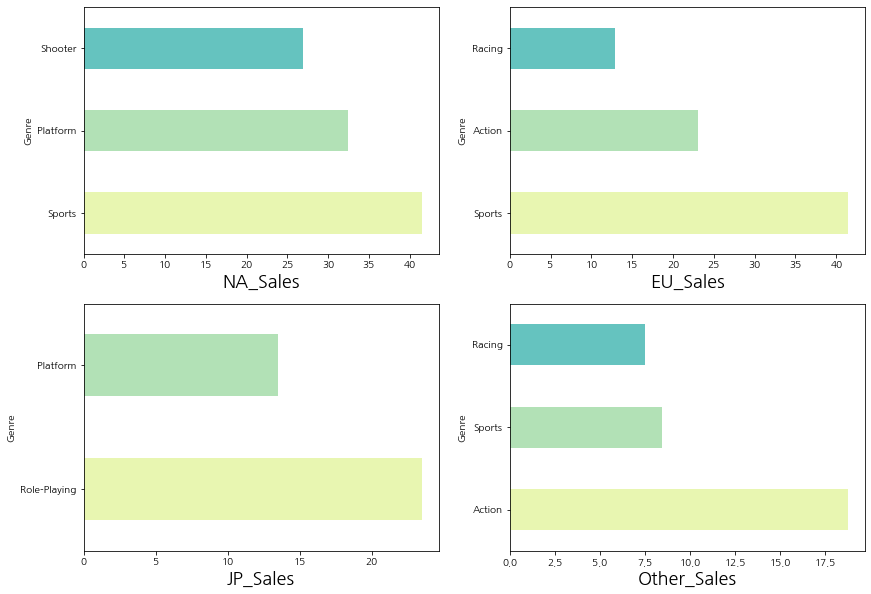

In [ ]:
grp = ['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']
plt.rcParams['figure.figsize'] = [14, 10]

colors = sns.color_palette('YlGnBu')

for i, k in enumerate(grp):
    plt.subplot(2, 2, i+1)
    globals()['df_{}_G'.format(k[:2])][k].plot(kind = 'barh',color = colors)
    plt.xlabel(k, fontsize=18)

**< 지역별 출고량 제일 많은 상위 5개 게임 >**

*   북미 : 'Sports'와 'Platform' 장르

*   유럽 : 'Sports' 장르

*   일본 : 'Role-Playing' 장르

*   그 외 지역 : 'Action' 장르

2. 지역별 상위 5개 게임의 플랫폼 조사

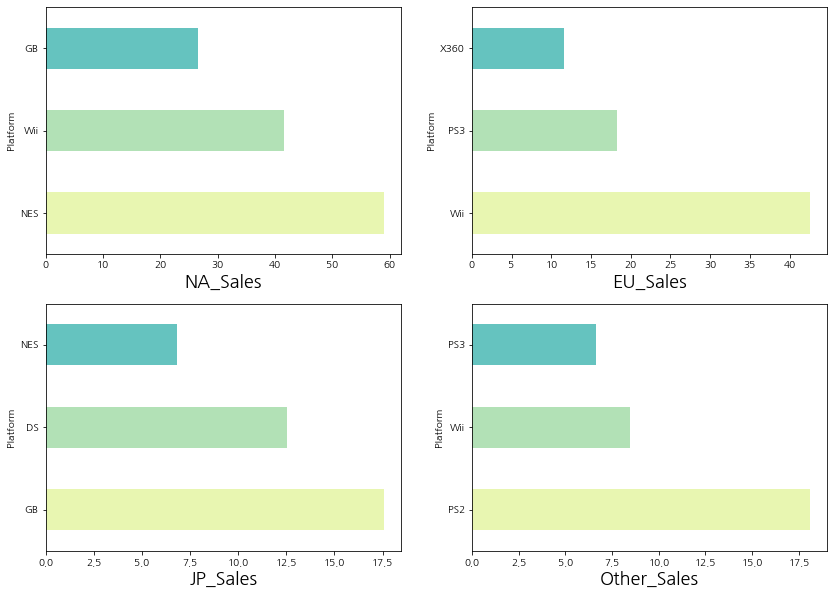

In [ ]:
# 지역별 상위 5개 게임의 플랫폼 조사
grp = ['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']
plt.rcParams['figure.figsize'] = [14, 10]

colors = sns.color_palette('YlGnBu')

for i, k in enumerate(grp):
    plt.subplot(2, 2, i+1)
    globals()['df_{}_P'.format(k[:2])][k].plot(kind = 'barh',color = colors)
    plt.xlabel(k, fontsize=18)

**< 지역별 선호하는 상위 5개 플랫폼 >**

*   북미 : 'NES'와 'Wii' 플랫폼

*   유럽 : 'Wii' 플랫폼

*   일본 : 'GB' 플랫폼

*   그 외 국가 : 'PS' 플랫폼

# **분석결과**

**1. 지역에 따라서 선호하는 게임 장르**

*   북미, 유럽과 그 외 지역은 **Action -> sports -> shooter** 장르 순으로 많은 출고량을 보인다.

*   일본은 **Role-Playing -> Action -> Sports** 장르 순으로 많은 출고량을 보인다.

*    role-playing이 가장 출고량이 높았던 일본지역을 제외한 북미, 유럽과 그 외 지역에서는 Action, sports, shooter이 출고량이 높았고 이를 제외한 다른 장르도 거의 비슷한 형태를 보였다. 

  즉, 일본지역을 제외한 다른 지역에서는 선호하는 게임 장르가 유사하다.

 **▶ 결론**

 만약 새로운 게임을 북미지역, 유럽지역, 기타지역에서 출시한다면 Action, sports, shooter 장르가 좋을 것으로 판단된다. 
 
 또한, 일본에서는 Action, sports장르는 괜찮지만, shooter 장르는 출시하지 않는 것이 좋을 것으로 판단된다.


**2. 연도별 게임의 트렌드**
*  연도 별 게임 전체 트렌드(시기에 따른 전체 게임 트렌드)

    연도 별 총 출고량을 확인한 결과, 과거부터 출고량이 지속적으로 상승하다가 1995년부터 급격히 상승하여 2005-2010년 전 후로 정점을 찍고, 급격히 출고량이 감소하는 양상을 보인다.

*  연도 별 게임 장르 트렌드

    1990년부터 2010년까지 'Platfoom'장르가 줄어들면서 'Action'과 'Sports'장르가 상승하였고, 2010년 이후로 'Action', 'Shooter' 장르가 상승하는 양상을 보인다.

*  연도 별 게임 플랫폼 트렌드

    1990년부터 2004년까지 'PS', 'PS2' 플랫폼의 출고량이 가장 많이 차지했고, 2005년부터 2010년까지는 'DS'와 'Wii' 플랫폼이 출시되면서 'PS'플랫폼들은 감소하고 'DS'와 'Wii' 플랫폼이 상승하는 양상을 보인다. 2010년 이후로는 다시 새로운 버전인 'PS3' 플랫폼이 출시하고 'X360'이라는 새로운 플랫폼과 트렌드를 바꾸는 양상을 보인다.

 **▶ 결론**

 만약 새로운 게임을 출시한다면 연도 별 게임 트렌드 분석결과, 장르에서는 Action, Shooter 장르가 좋을 것으로 판단된다.
 
 게임 플랫폼에서는 'PS3', 'X360' 플랫폼이 좋을 것으로 판단된다.


**3. 출고량이 높은 게임에 대한 분석**
*  (전 시기) 출고량 제일 많은 게임 Top3

    * 1위 : Will Sports

    * 2위 : Grand Theft Auto V

    * 3위 : super Mario Bros.

    * 출고량 제일 많은 'Will Sports'게임의 플랫폼은 'Wii'이고, 1, 3위인 'Will Sports', 'super Mario Bros.'의 제작회사는 'Nintendo' 이다.

*  지역별 출고량 많은 게임 Top5

    *   북미 : 'Sports'와 'Platform' 장르

    *   유럽 : 'Sports' 장르

    *   일본 : 'Role-Playing' 장르

    *   그 외 지역 : 'Action' 장르

*   지역별 선호하는 플랫폼 Top5

    *   북미 : 'NES'와 'Wii' 플랫폼

    *   유럽 : 'Wii' 플랫폼

    *   일본 : 'GB' 플랫폼

    *   그 외 지역 : 'PS' 플랫폼

 **▶ 결론**

 만약 새로운 게임을 출시한다면 북미지역, 유럽지역에서는 'NES'와 'Wii' 플랫폼을 활용한 'Sports' 장르가 좋을 것으로 판단된다. 
 
 또한, 일본에서는 'GB' 플랫폼을 활용한 'Role-Playing' 장르가 좋을 것으로 판단된다.
 
 그 외 국가에서는 'PS' 플랫폼을 활용한 'Action' 장르가 좋을 것으로 판단된다.



# **결론 : 다음 분기에 어떤 게임을 설계해야 할까?**

**최근 10년간의 트렌드와 지역별 출고량의 수와 선호 장르, 플랫폼을 비교분석 후 지역별 게임판매전략**

* 북미 : 'NES'플랫폼을 활용한 'Shooter'장르의 게임
* 유럽 : 'Wii'플랫폼을 활용한 'Sports'장르의 게임
* 일본 : 'DS'플랫폼을 활용한 'Role-Palying'장르의 게임
*  그 외 지역 : 'PS'플랫폼을 활용한 'Action'장르의 게임  
